In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [4]:
with open("../scripts/dpo_rl_model/dataset.pickle", "rb") as file:
#with open("../ressources/dpo_rl_model_25-01-13_20x200/dataset.pickle", "rb") as file:
    original_df = pickle.load(file)

In [5]:
original_df

,llmin,configuration,parameters,argos,type,scores_bt1,scores_bt2,llmout_A,llmout_B,scores_A,scores_B,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-4.025414,-1.772368,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.972433,1.000000,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-7.261462,-8.413288,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.848944,0.823834,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-15.63658,-12.4462,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.666364,0.735915,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-17.89192,-11.662982,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.802771,0.878985,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-19.77592,-16.96608,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.576125,0.637380,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,"In this setting, a rectangle is formed with di...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-22.50208,-3.167805,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.534404,0.938266,14
1595,"The circular arena, having a radius of 1.67 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Aggregation,0.0,0.416,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.000000,0.505946,14
1596,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,7.2,7.4,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.800000,0.822222,14
1597,The rectangular area has dimensions 4.56 m x 6...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.6,0.4,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.066667,0.044444,14


In [6]:
df = original_df

In [7]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

    dataset_position          type average_score
0                  0   Aggregation      0.259167
1                  0    Connection    -18.748341
2                  0  Distribution    -12.190616
3                  0      Foraging      1.188235
4                  1   Aggregation      0.279665
5                  1    Connection     -17.40222
6                  1  Distribution    -12.254921
7                  1      Foraging      0.916667
8                  2   Aggregation      0.285816
9                  2    Connection    -17.591299
10                 2  Distribution    -13.237754
11                 2      Foraging      1.426471
12                 3   Aggregation      0.210287
13                 3    Connection    -22.292257
14                 3  Distribution     -7.460825
15                 3      Foraging           3.9
16                 4   Aggregation      0.279096
17                 4    Connection    -17.547871
18                 4  Distribution    -11.271215
19                 4

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

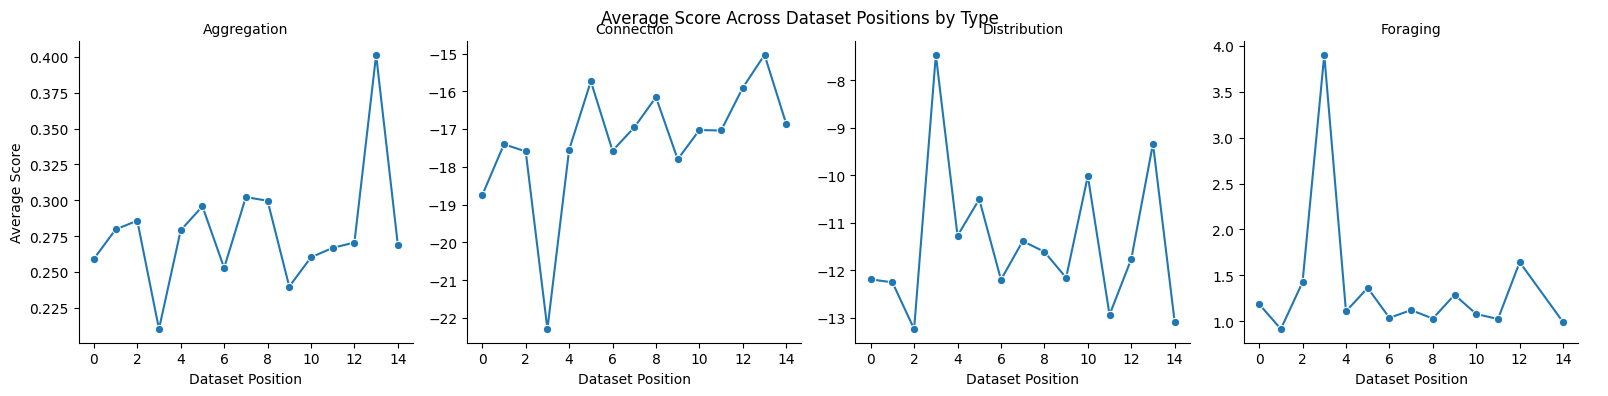

In [9]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()

In [10]:
df[df.dataset_position == 24]

,llmin,configuration,parameters,argos,type,scores_bt1,scores_bt2,llmout_A,llmout_B,scores_A,scores_B,dataset_position,average_score


/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seabor

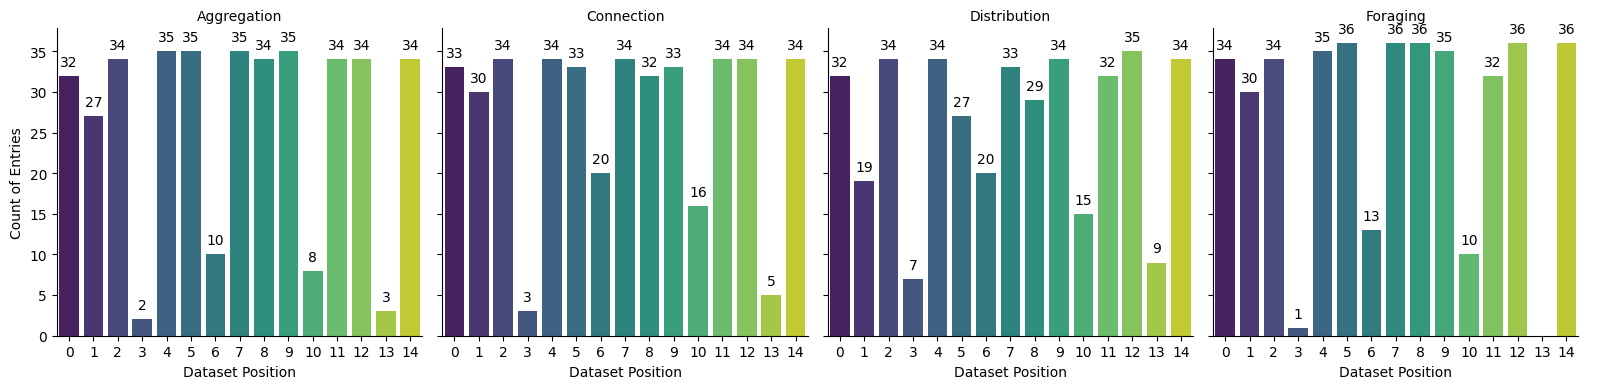

In [11]:
# Count non-null entries for each combination of type and dataset_position
length_counts = df.groupby(['type', 'dataset_position'])['average_score'].count().reset_index()
length_counts.columns = ['type', 'dataset_position', 'length']
g = sns.FacetGrid(length_counts, col='type', col_wrap=4, height=4)
bar_plot = g.map_dataframe(sns.barplot, x='dataset_position', y='length', palette='viridis')

# Annotate bars with the actual numbers
for ax in bar_plot.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')

g.set_axis_labels("Dataset Position", "Count of Entries")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


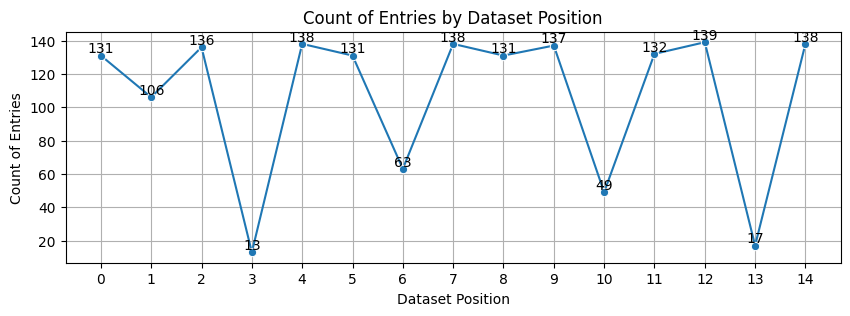

In [12]:
length_counts = df.groupby('dataset_position')['average_score'].count().reset_index()
length_counts.columns = ['dataset_position', 'length']
plt.figure(figsize=(10, 3))
line_plot = sns.lineplot(data=length_counts, x='dataset_position', y='length', marker='o')

# Annotate points with the actual numbers
for index, row in length_counts.iterrows():
    line_plot.text(row['dataset_position'], row['length'], 
                   f'{row["length"]}', 
                   color='black', 
                   ha='center', 
                   va='bottom')

plt.title('Count of Entries by Dataset Position')
plt.xlabel('Dataset Position')
plt.ylabel('Count of Entries')
plt.xticks(length_counts['dataset_position'])  # Ensure all dataset positions are shown
plt.grid()
plt.show()
